# 2.6 概率

## 基本概率论

In [4]:
%matplotlib inline
import random
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()

In [5]:
fair_probs = [1.0 / 6] * 6
print(f"fair_probs: {fair_probs}")
# 掷一次骰子
np.random.multinomial(1, fair_probs)

fair_probs: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


array([0, 0, 0, 1, 0, 0], dtype=int64)

In [6]:
# 掷 1000 次骰子统计概率
counts = np.random.multinomial(1000, fair_probs).astype(np.float32)
counts / 1000

array([0.161, 0.146, 0.183, 0.171, 0.164, 0.175])

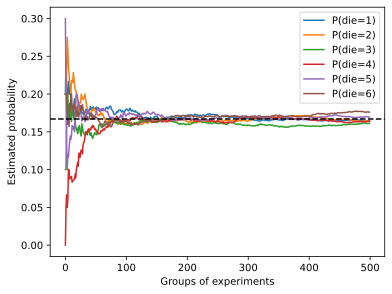

In [7]:
counts = np.random.multinomial(10, fair_probs, size=500)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

## 练习题

练习题 1：进行 m = 500 组实验，每组抽取 n = 10 个样本。改变 m 和 n，观察和分析实验结果。

若 $m$ 不变，$n$ 越大那么概率收敛越快。$n$ 不变，$m$ 越大那么最后收敛结果就越接近真实概率值。 

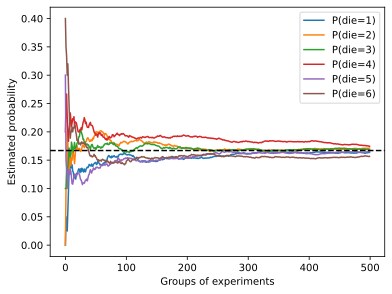

In [8]:
def demo(m, n):
    fair_probs = [1.0 / 6] * 6
    counts = np.random.multinomial(n, fair_probs, size=m)
    cum_counts = counts.astype(np.float32).cumsum(axis=0)
    estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

    d2l.set_figsize((6, 4.5))
    for i in range(6):
        d2l.plt.plot(estimates[:, i].asnumpy(),label=("P(die=" + str(i + 1) + ")"))
    d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
    d2l.plt.gca().set_xlabel('Groups of experiments')
    d2l.plt.gca().set_ylabel('Estimated probability')
    d2l.plt.legend();

demo(m=500, n=10)

练习题 2：给定两个概率为 $P(A)$ 和 $P(B)$ 的事件，计算 $P(A \cup B)$ 和 $P(A \cap B)$ 的上限和下限

$$
max(P(A), P(B)) \leq P(A \cup B) \leq P(A)+P(B)
$$

$$
0 \leq P(A \cap B) \leq min(P(A), P(B))
$$

练习题 3：假设我们有一系列随机变量，例如 $A$、$B$ 和 $C$，其中 $B$ 只依赖于 $A$，而 $C$ 只依赖于 $A$，而 $C$ 只依赖于 $B$，能简化联合概率 $P(A,B,C)$ 吗？

$$
A \rightarrow B \rightarrow C
$$

$$
P(A,B,C) = P(C | A,B) P(A,B) = P(C | A,B)P(B|A)P(A)
$$

练习题 4：在 2.6.2.6 节中，第一个测试更准确。为什么不运行第一个测试两次，而是同时运行第一个和第二个测试？

重复测试会有较强的相关关系，为了防止随机因素的干扰